# Initial EDA and data cleaning

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



## Import packages


In [20]:
# Import packages
import sys

# Adds the utils directory to the PYTHONPATH
sys.path.append("../utils")  

# Imports everything from common_imports.py
from common_imports import *  

## Load dataset


In [21]:
# Adds the project root to the PYTHONPATH
sys.path.append("..")  
from config import raw_data_path

# Load dataset into a dataframe
df_raw = pd.read_csv(raw_data_path)

# Display first few rows of the dataframe
df_raw.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [22]:
# Basic information about the data
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [23]:
# Descriptive statistics about the data
df_raw.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Rename columns

We inspect the columns names to see if the are names that stand out or need to be modified

In [24]:
# Display all column names
df_raw.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [25]:
# Rename columns
df_raw = df_raw.rename(columns={"Work_accident" : "work_accident",
                                "time_spend_company" : "tenure",
                                "average_montly_hours" : "average_monthly_hours",
                                "Department" : "department"})

# Display all column names after the update
df_raw.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

## Missing values

In [26]:
# Check for missing values
df_raw.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values.

## Duplicates

In [27]:
# Check for duplicates
duplucates = df_raw.duplicated()
print(f'Duplicates : {duplucates.sum()} \nPercentage : {duplucates.sum() / len(df_raw) * 100 :.2f} %')

Duplicates : 3008 
Percentage : 20.05 %


We have identified 3008 duplicate entries, which account for 20% of the total data set. It is important to take this proportion into consideration when managing the duplicates in order to maintain the integrity of the data. Let's begin by examining a few of the duplicate entries.

In [28]:
# Inspect some rows containing duplicates as needed
df_raw[duplucates].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


Let's drop the duplicates.

In [29]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df_raw.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Outliers

First, we examine the boxpot of the `tenure` column for any outliers.

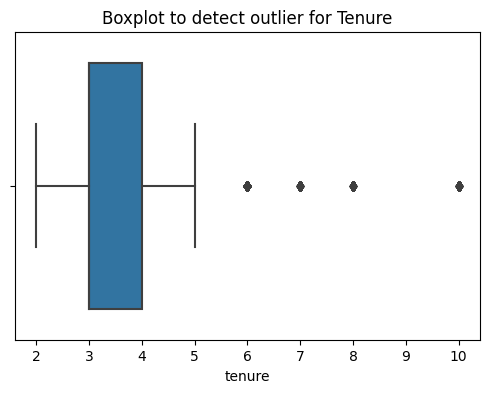

In [30]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.boxplot(x='tenure', data=df)
ax.set_title("Boxplot to detect outlier for Tenure")
plt.show;

Then, we define a function to calculate the number of outliers in a selected column.

In [31]:
# Determine the number of rows containing outliers

def num_outliers(column):
    """
        This function takes as parameter a column of the dataset and does the following:
         - computes its 25th and 75th percentiles
         - determine the interquantile range
         - define the upper and lower limits for non_outlier values
         - count and print the number of outlier
        
        Formulas:
        interquantile range (iqr): 75th percentile - 25th percentile
        upper limit : 75th percentile + 1.5 * iqr
        lower limit : 25th percentile - 1.5 * iqr

    """

    # Compute 25th percentile
    percent_25 = df[column].quantile(0.25)

    # Compute 75th percentile
    percent_75 = df[column].quantile(0.75)

    # Compute interquantile range
    iqr = percent_75 - percent_25

    # Define upper and lower limits for non-oulier values in column
    upper_limit = percent_75 + 1.5 * iqr
    lower_limit = percent_25 - 1.5 * iqr
    print(f'Upper Limit : {upper_limit}')
    print(f'Lower Limit : {lower_limit}')

    # Identify the subset of data containing outliers
    outliers = df[(df[column] > upper_limit) | (df[column] < lower_limit)]

    # Count number of rows with outliers
    print(f"Number of Outliers in '{column}' : {len(outliers)} ")


We can now inquire the number of outliers in `tenure` column.

In [32]:
# Number of rows with outliers in 'tenure'
num_outliers('tenure')

Upper Limit : 5.5
Lower Limit : 1.5
Number of Outliers in 'tenure' : 824 


Different models have varying sensitivity to outliers. Once we reach the model-building stage, we will assess the need to eliminate outliers depending on the specific model we opt to utilise.